In [54]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes

diabetes_sklearn = load_diabetes()


diabetes_df = pd.DataFrame(data=diabetes_sklearn.data,
                           columns=diabetes_sklearn.feature_names)

diabetes_df['target'] = diabetes_sklearn.target

diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [55]:
X = diabetes_sklearn.data
y = diabetes_sklearn.target
   
# Apply PCA with two components 
from sklearn.decomposition import PCA
pca = PCA(.65)
X_pca = pca.fit_transform(X)
 
# Explained Variance Ratio
pca.explained_variance_ratio_ #relative importance of components

array([0.40242108, 0.14923197, 0.12059663])

### Here, we have an array where 40% of the variance is explained by the first principal component (PC1) and 
### the 15% is explained by PC2 and 12% by PC3. Together, 
### they explain 67% of the variance of the data.

# How to Identify the Importance of Each Original Feature

In [56]:
print(abs(pca.components_))

[[0.2164309  0.18696688 0.30316216 0.27173773 0.34325511 0.35186068
  0.28243681 0.4288337  0.37861802 0.32218296]
 [0.04436721 0.3865472  0.15628128 0.138266   0.57302691 0.45594185
  0.50623907 0.06818072 0.026187   0.08494884]
 [0.49466786 0.10686424 0.16752691 0.51357084 0.0685791  0.26968897
  0.38603191 0.38067992 0.06363011 0.2768422 ]]


In [57]:
idx = np.argmax(abs(pca.components_), axis=1)

print(idx)

[7 4 3]


### s3, bp, bmi are the most three important features

In [28]:
pca.explained_variance_  #individual variance in absolute number

array([0.00912519, 0.00338394, 0.00273462])

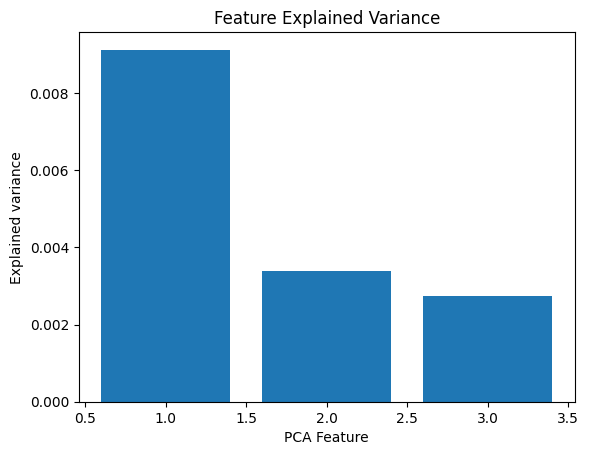

In [29]:
# Bar plot of explained_variance
import matplotlib.pyplot as plt
plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
    )
 
plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

In [30]:
pca.score(X)

17.93307913519765

# Now using train and test dataset

In [69]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()


diabetes_df = pd.DataFrame(data=diabetes.data,
                           columns=diabetes.feature_names)

diabetes_df['target'] = diabetes.target

diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [70]:
X = diabetes_df.iloc[:, 0:-1].values
print(X.shape)
y = diabetes_df.iloc[:, -1].values
print(y.shape)

(442, 10)
(442,)


In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [72]:
pca = PCA(0.65)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Explained Variance Ratio
pca.explained_variance_ratio_ #relative importance of components

array([0.41537947, 0.14022569, 0.11542305])

In [81]:
X_train[0]

array([ 0.01264814,  0.05068012,  0.00241654,  0.0563009 ,  0.02732605,
        0.01716188,  0.04127682, -0.03949338,  0.00370906,  0.07348023])

In [82]:
X_train_pca[0]

array([ 0.04104818, -0.01115322,  0.07732492])

In [73]:
print(abs(pca.components_))

[[0.23407134 0.17993547 0.31108607 0.27430238 0.33194466 0.33280716
  0.28414879 0.42177706 0.38377357 0.33756638]
 [0.06064859 0.37808356 0.17547633 0.15725858 0.57785175 0.47586989
  0.47371054 0.04251347 0.03067198 0.10167466]
 [0.53534561 0.06201051 0.11511253 0.48829067 0.04895193 0.24709701
  0.4154025  0.39685378 0.04023075 0.25051387]]


In [74]:
idx = np.argmax(abs(pca.components_), axis=1)

print(idx)

[7 4 0]


In [75]:
pca.explained_variance_  #individual variance in absolute number

array([0.00959114, 0.00323782, 0.00266513])

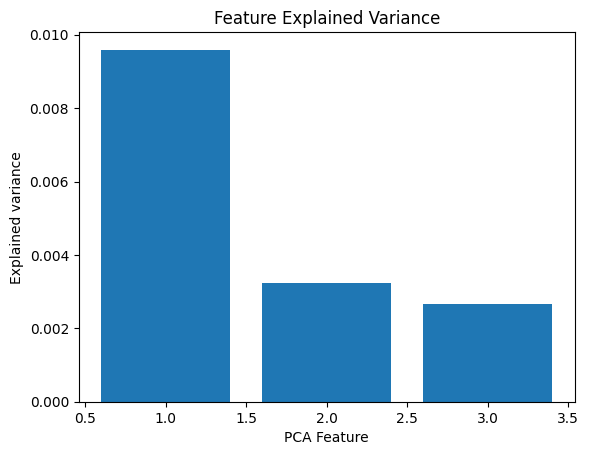

In [76]:
# Bar plot of explained_variance
import matplotlib.pyplot as plt
plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
    )
 
plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

In [77]:
pca.score(X_test,y = None) # always pass the original dataset for score because in score, pca itself transforms it to X_tes_pca 

18.14036511849992

# Now use Random Forest Regressor

In [79]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=100, random_state=42)  # Adjust n_estimators as needed

# Train the model
reg.fit(X_train_pca, y_train)

RandomForestRegressor(random_state=42)

In [84]:
y_pred = reg.predict(X_test_pca)
y_pred[0]

195.11

### Evaluation , finding odds

In [88]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("r2:", r2)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("rmse:", rmse)

r2: 0.16638028636592705
rmse: 65.38150397320142


In [89]:
data = {'actual': y_test, 'prediction': y_pred}

df = pd.DataFrame(data)
df.head()

,actual,prediction
0,321.0,195.11
1,215.0,156.30
2,127.0,153.91
3,64.0,131.90
4,175.0,130.82


In [90]:
import numpy as np
df["difference"] = np.abs(df['actual'] - df['prediction']) <= 10
df.head()

,actual,prediction,difference
0,321.0,195.11,False
1,215.0,156.30,False
2,127.0,153.91,False
3,64.0,131.90,False
4,175.0,130.82,False


In [92]:
df[df["difference"] == True].shape[0]

7

In [94]:
df[df["difference"] == False].shape[0]

82

In [95]:
prob = 7/82
prob

0.08536585365853659

In [96]:
odds = prob/(1-prob)
odds

0.09333333333333334

## Without pca

In [97]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=100, random_state=42)  # Adjust n_estimators as needed

# Train the model
reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [98]:
y_pred = reg.predict(X_test)
y_pred[0]

238.41

In [99]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("r2:", r2)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("rmse:", rmse)

r2: 0.2440884487931676
rmse: 62.259611910779675


In [100]:
data = {'actual': y_test, 'prediction': y_pred}

df = pd.DataFrame(data)
df.head()

,actual,prediction
0,321.0,238.41
1,215.0,231.24
2,127.0,187.19
3,64.0,110.78
4,175.0,199.92


In [101]:
import numpy as np
df["difference"] = np.abs(df['actual'] - df['prediction']) <= 10
df.head()

,actual,prediction,difference
0,321.0,238.41,False
1,215.0,231.24,False
2,127.0,187.19,False
3,64.0,110.78,False
4,175.0,199.92,False


In [102]:
df[df["difference"] == True].shape[0]

9

In [103]:
df[df["difference"] == False].shape[0]

80

In [104]:
prob = 7/82
prob

0.08536585365853659

In [105]:
odds = prob/(1-prob)
odds

0.09333333333333334